-49.51224737658458 -41.10638041683498
[-33.20710392 -33.65559037 -34.10599243 -34.55833013 -35.01262385
 -35.46889431 -35.92716257 -36.38745009 -36.84977867 -37.31417051
 -37.78064821 -38.24923475 -38.71995353 -39.19282839 -39.66788358
 -40.1451438  -40.6246342  -41.10638042 -41.59040854 -42.07674517
 -42.5654174  -43.05645283 -43.54987962 -44.04572644 -44.54402255
 -45.04479777 -45.54808251 -46.05390779 -46.56230524 -47.07330715
 -47.58694647 -48.1032568  -48.62227247 -49.1440285  -49.66856066
 -50.19590548 -50.72610027 -51.25918314 -51.79519304 -52.33416976
 -52.87615397 -53.42118727 -53.96931216 -54.52057213 -55.07501165
 -55.63267624 -56.19361244 -56.75786791 -57.32549143 -57.89653296
 -58.47104364 -59.04907588 -59.63068335 -60.21592108 -60.80484546
 -61.3975143  -61.99398689 -62.59432406 -63.1985882  -63.80684321
 -64.41915525 -65.03559156 -65.65622112 -66.28111563 -66.91034811
 -67.54399379 -68.18213002 -68.82483635 -69.47219464 -70.12428911
 -70.78120647 -71.44303602 -72.1098697

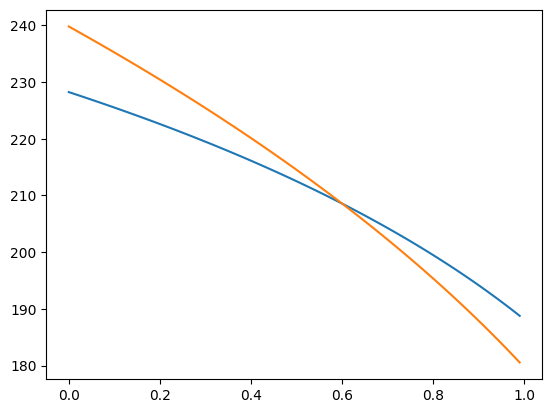

In [41]:
from scipy.optimize import fsolve
import math
import numpy as np
import matplotlib.pyplot as plt

alpha = 3
beta = 4

sigma = 5.67*10**-8
P_S_0 = 341.3
r_SE = 0.17
a_O3 = 0.08
a_atm = 0.1451

def temperature(p):
    T_A, T_E = p

    P_trans_O3 = (1-a_O3)*P_S_0
    P_trans_atm = (1-a_atm)*P_trans_O3
    P_r_E = r_SE*P_trans_atm
    P_abs_E = (1-r_SE)*P_trans_atm
    P_abs_O3 = a_O3*(P_S_0 + (1-a_atm)*P_r_E)
    P_abs_atm = a_atm*(P_trans_O3+P_r_E)

    return (P_abs_E + alpha*(T_A - T_E) + beta*(T_A-T_E) - sigma*T_E**4, P_abs_O3 + P_abs_atm - alpha*(T_A - T_E) - beta*(T_A-T_E) - sigma*T_A**4)


x, y =  fsolve(temperature, (273, 273))

print(x-273, y-273)
N = 100
T_A_array = np.zeros(N)
T_E_array = np.zeros(N)
r_SE_array = np.zeros(N)

x,y = (273,273)

for i in range(N):
    r_SE_array[i] = i/N
    r_SE = r_SE_array[i]
    
    T_A_array[i],T_E_array[i] = fsolve(temperature,(x,y))
print(T_E_array-273)

plt.plot(r_SE_array,T_A_array)
plt.plot(r_SE_array,T_E_array)
plt.show()
